<a href="https://colab.research.google.com/github/AimanSh123/Speaker-Recognition-Project-using-4-different-Models/blob/main/SpeakerRecongition_Novel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
CREATE_CSV_FILES = True

In [150]:
TEST_CSV_FILE = "/content/drive/MyDrive/test_novel.csv"
# "/content/drive/MyDrive/test"

In [151]:
TRAIN_CSV_FILE = "/content/drive/MyDrive/train_novel.csv"
#"/content/drive/MyDrive/train"

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("/content/drive/MyDrive/train_novel", TRAIN_CSV_FILE)
    extractWavFeatures("/content/drive/MyDrive/test_novel", TEST_CSV_FILE)
    # extractWavFeatures("/content/drive/MyDrive/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    # extractWavFeatures("/content/drive/MyDrive/moreSpeakersTest", MORE_TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")


The features of the files in the folder /content/drive/MyDrive/train_novel will be saved to /content/drive/MyDrive/train_novel.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder /content/drive/MyDrive/test_novel will be saved to /content/drive/MyDrive/test_novel.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
CSV files are created


In [153]:
#Reading a dataset and convert file name to corresbonding umnber

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][3]
        #print(speaker)
        if speaker == "A":
            speaker = "0"
        elif speaker == "s":
            speaker = "1"
        elif speaker == "I":
            speaker = "2"
        elif speaker == "J":
            speaker = "3"   
        elif speaker == "H":
            speaker = "4"
        elif speaker == "Z":
            speaker = "5"
        elif speaker == "M":
            speaker = "6"  
        elif speaker == "K":
            speaker = "7"                     
        else: 
            speaker = "8"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
# moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
# moreTestData = preProcessData(MORE_TEST_CSV_FILE)


/content/drive/MyDrive/train_novel.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.090548        2433.785337         1937.172842  4677.764084   
1  0.085492        2381.426023         1950.832888  4582.566088   
2  0.095311        2304.894384         1899.827889  4485.658187   
3  0.101062        2370.200991         1846.717243  4487.990570   
4  0.074996        2253.645764         1893.216268  4399.353027   

   zero_crossing_rate       mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0            0.141566 -350.833618  63.101856 -30.741991  30.045263 -23.090305   
1            0.129349 -298.379089  78.663116 -33.587658  32.049206 -30.985176   
2            0.124379 -297.264160  81.437286 -29.775564  33.900043 -27.111790   
3            0.149979 -285.654327  84.446510 -46.729420  34.729500 -34.794926   
4            0.128087 -327.343842  80.409477 -31.582376  23.104616 -26.307188   

   ...    mfcc12     mfc

In [154]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train = np.array(trainData.iloc[:, :-1], dtype = float)
y_train = np.array(trainData.iloc[:, -1:], dtype = float)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = np.array(testData.iloc[:, -1:], dtype = float)

print("Y from training data:", y_train.shape)
print("Y from test data:", y_test.shape)

Y from training data: (74, 1)
Y from test data: (14, 1)


In [155]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

<ipython-input-155-dd54d1bdebe3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [156]:
def getSpeaker(speaker):
     speaker = str(speaker)
     if speaker == "0":
        return "Aiman"
     elif speaker == "1":
        return "Sakshi"
     elif speaker == "2":
           return "Ino"
     elif speaker == "3":
           return "Juo"   
     elif speaker == "4":
           return "Hani"
     elif speaker == "5":
           return "Zoya"
     elif speaker == "6":
          return "Maan"  
     elif speaker == "7":
           return "Khyati"                     
     else: 
         return "Unknown"


        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        help = int(regressor.predict(X_data[i:i+1]))
        prediction = getSpeaker(help)
        print(prediction)
        speaker = getSpeaker(int(y_data[i]))
        if printDigit == True:
            print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, speaker, prediction, speaker==prediction))
        else:
            print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

In [157]:
print(regressor.score(X_test, y_test))

0.909336442687747


In [158]:
printPrediction(X_test[0:7], y_test[0:7], False)


# Generate predictions
Ino
y=Aiman     - prediction=Ino       - match=False
Aiman
y=Aiman     - prediction=Aiman     - match=True
Aiman
y=Sakshi    - prediction=Aiman     - match=False
Maan
y=Khyati    - prediction=Maan      - match=False
Zoya
y=Maan      - prediction=Zoya      - match=False
Maan
y=Maan      - prediction=Maan      - match=True
Maan
y=Maan      - prediction=Maan      - match=True


Text(0.5, 1.0, 'Random forest regression')

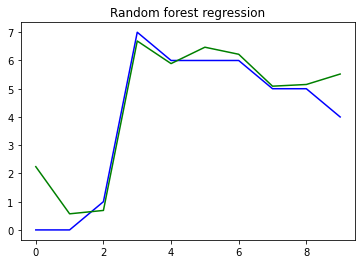

In [159]:
plt.plot(y_test[0:10], color = 'blue') 
plt.plot(regressor.predict(X_test[0:10]), color = 'green')
plt.title("Random forest regression")

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [161]:
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.42857142857142855


Text(0.5, 1.0, 'KNN')

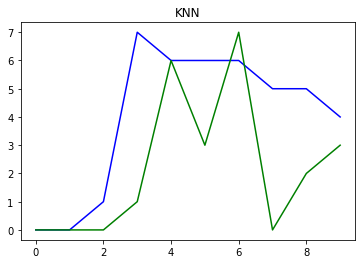

In [162]:
plt.plot(y_test[0:10], color = 'blue') 
plt.plot(knn.predict(X_test[0:10]), color = 'green')
plt.title("KNN")

In [163]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [165]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
print(clf.score(X_test, y_test))

0.0


Text(0.5, 1.0, 'CLF')

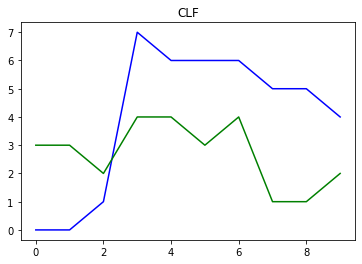

In [167]:
plt.plot(y_test[0:10], color = 'blue') 
plt.plot(clf.predict(X_test[0:10]), color = 'green')
plt.title("CLF")

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
SEED = 1
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
  
# Fit to training set
gbr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=1)

In [169]:
print(gbr.score(X_test, y_test))

0.934313638817124


Text(0.5, 1.0, 'GBR')

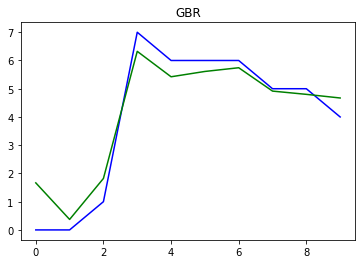

In [170]:
plt.plot(y_test[0:10], color = 'blue') 
plt.plot(gbr.predict(X_test[0:10]), color = 'green')
plt.title("GBR")

In [171]:
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        help = int(gbr.predict(X_data[i:i+1]))
        prediction = getSpeaker(help)
        print(prediction)
        speaker = getSpeaker(int(y_data[i]))
        if printDigit == True:
            print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, speaker, prediction, speaker==prediction))
        else:
            print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

In [172]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

In [173]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [174]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

algorithms = [('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest classifier', RandomForestClassifier()), 
              ('Gradientboost classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

KNN classifier Report :
              precision    recall  f1-score   support

         0.0       0.25      0.50      0.33         2
         1.0       0.50      0.67      0.57         3
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         2
         5.0       1.00      0.50      0.67         2
         6.0       0.00      0.00      0.00         3
         7.0       1.00      0.50      0.67         2

    accuracy                           0.36        14
   macro avg       0.34      0.27      0.28        14
weighted avg       0.43      0.36      0.36        14



Random Forest classifier Report :
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.50      0.67      0.57         3
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [175]:
import seaborn as sns

In [176]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [148]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

KNN classifier


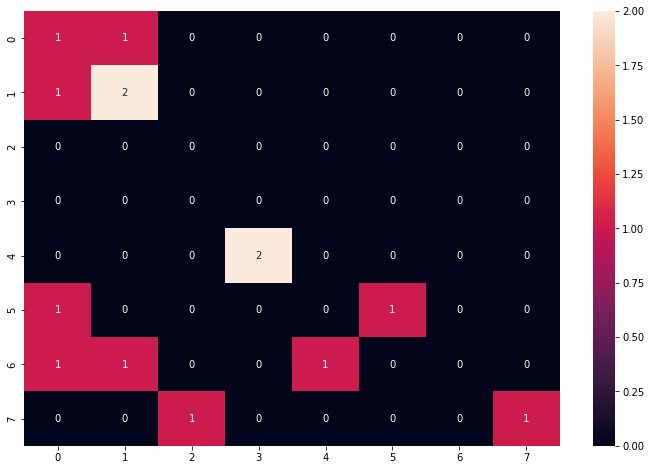



Random Forest classifier


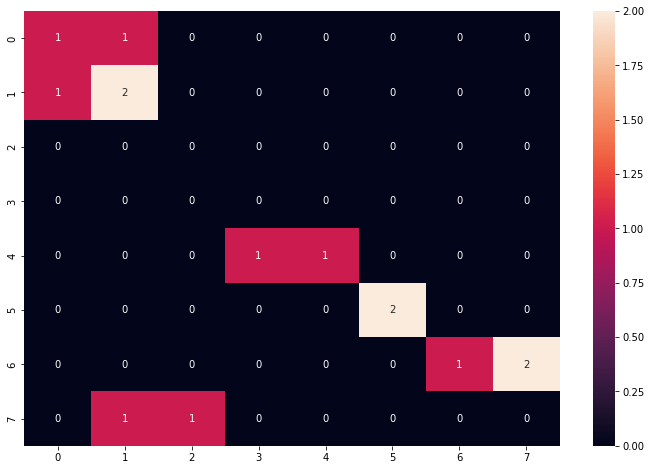



Gradientboost classifier


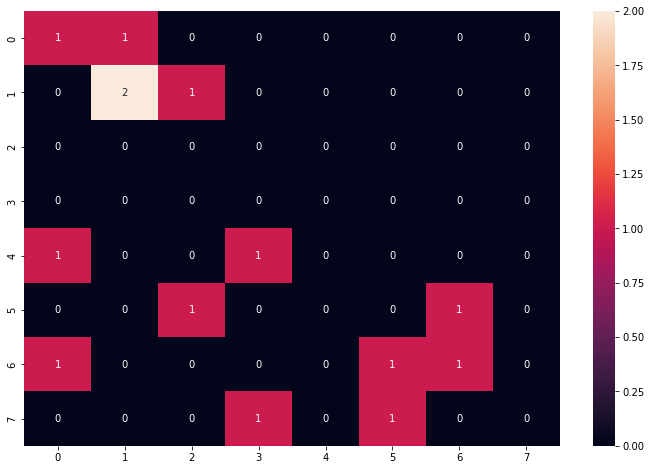



MLP


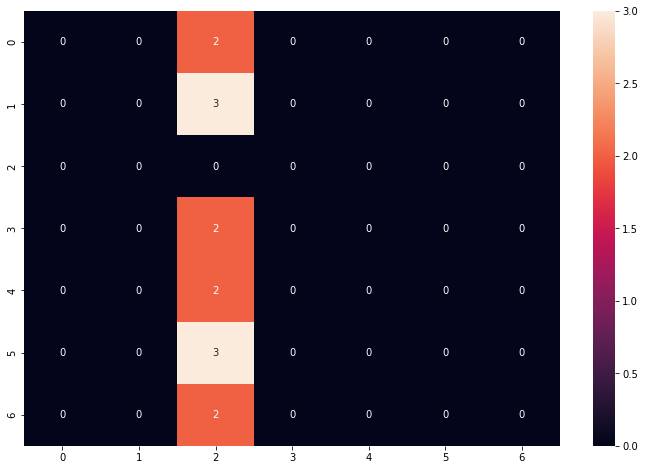

In [177]:
for index, tup in enumerate(trained_models):
      prepare_confusion_matrix(tup[0],tup[1])
      print("\n")

In [178]:
print(model_and_score)


{'KNN classifier': '47.2972972972973%', 'Random Forest classifier': '100.0%', 'Gradientboost classifier': '100.0%', 'MLP': '16.216216216216218%'}
